In [26]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [27]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [29]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [30]:
train_images.shape

(60000, 28, 28)

In [31]:
len(train_labels)

60000

In [33]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [34]:
test_images.shape

(10000, 28, 28)

In [35]:
len(test_labels)

10000

# Data Processing

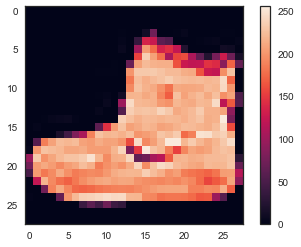

In [44]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [45]:
train_images = train_images / 255.0

test_images = test_images / 255.0

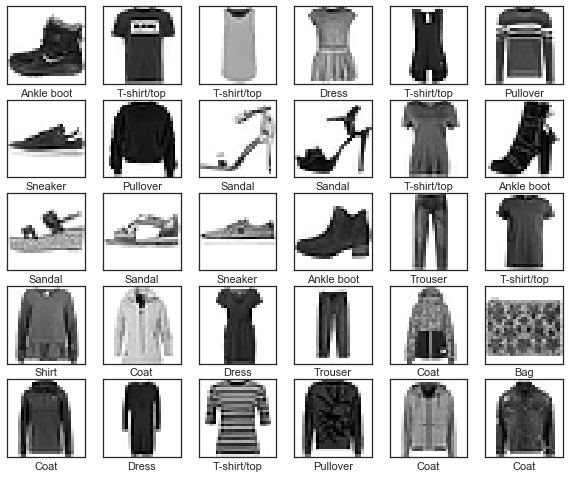

In [49]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [51]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.4948 - acc: 0.8256
Epoch 2/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.3719 - acc: 0.8644
Epoch 3/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.3338 - acc: 0.8780
Epoch 4/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.3103 - acc: 0.8854
Epoch 5/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.2926 - acc: 0.8917


In [53]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 42us/step
Test accuracy: 0.8743


In [54]:
predictions = model.predict(test_images)

In [56]:
predictions[0]

array([3.2213393e-06, 2.2004158e-09, 7.6641420e-08, 2.1982355e-08,
       1.8525323e-06, 1.0156629e-02, 2.0397638e-07, 2.7777007e-02,
       4.9021942e-06, 9.6205610e-01], dtype=float32)

In [57]:
np.argmax(predictions[0])

9

In [58]:
test_labels[0]

9

In [59]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 38us/step
Test accuracy: 0.8743


In [60]:
predictions = model.predict(test_images)

In [61]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

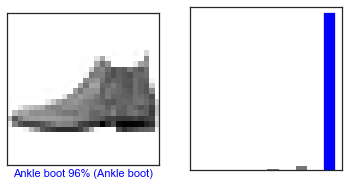

In [62]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

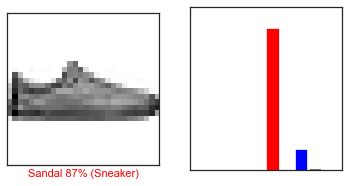

In [63]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

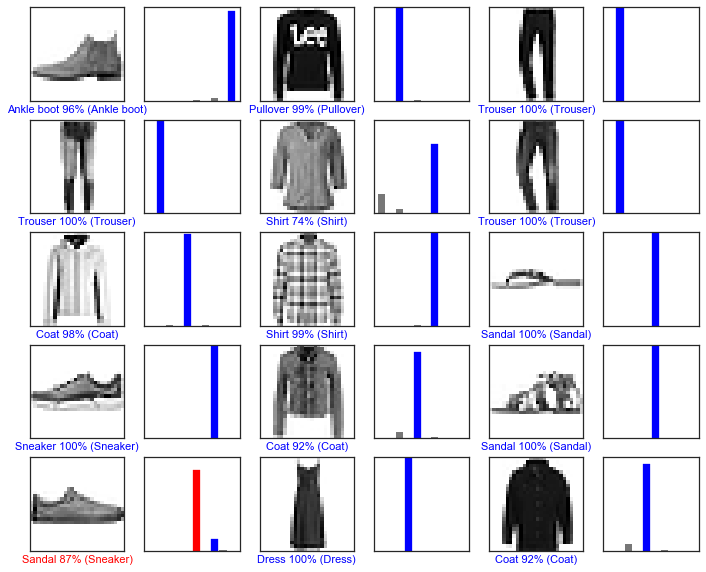

In [64]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [65]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [67]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [68]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.2213452e-06 2.2004198e-09 7.6641562e-08 2.1982354e-08 1.8525357e-06
  1.0156633e-02 2.0397619e-07 2.7777025e-02 4.9021933e-06 9.6205604e-01]]


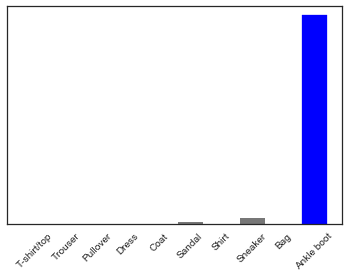

In [69]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [70]:
np.argmax(predictions_single[0])

9